# Language Detection Project
## Code Author: Meredith Vogel

## Goal: Use machine learning to determine the language of a phrase

In [16]:
# import packages
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

In [17]:
# import the dataset from Kaggle and print out a sample row
# https://www.kaggle.com/datasets/basilb2s/language-detection
dataset = pd.read_csv('Language Detection.csv')
dataset.sample()

,Text,Language
1014,The total operating characteristic (TOC) is an...,English


In [18]:
# count the number of times each language appears
dataset['Language'].value_counts(sort=False)

English       1385
Malayalam      594
Hindi           63
Tamil          469
Portugeese     739
French        1014
Dutch          546
Spanish        819
Greek          365
Russian        692
Danish         428
Italian        698
Turkish        474
Sweedish       676
Arabic         536
German         470
Kannada        369
Name: Language, dtype: int64

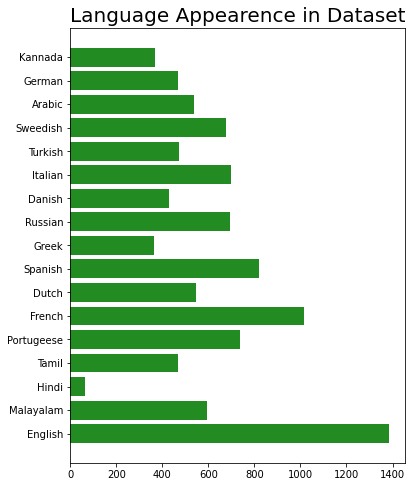

In [19]:
# plot the number of times each language appears
plt.figure(figsize=(6, 8))
plt.barh(dataset['Language'].unique(), dataset['Language'].value_counts(sort=False).values, color = 'forestgreen')
plt.title('Language Appearence in Dataset',fontsize = 20)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

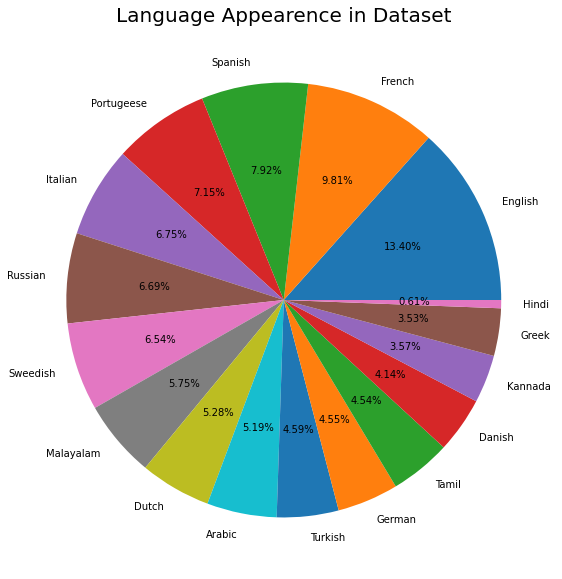

In [20]:
plt.figure(figsize=(10, 10))
plt.pie(x = dataset['Language'].value_counts(), autopct='%1.2f%%', labels=dataset['Language'].value_counts().index)
plt.title('Language Appearence in Dataset',fontsize = 20)
plt.show

In [21]:
# split the data into a test and train set for the naive bayes model

from sklearn.model_selection import train_test_split

X = dataset['Text'].values
y = dataset['Language'].values

# change the languages to a number label 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# keeping multiplicity of words but disregard order and grammer with bag of words
bagowords = CountVectorizer()

#tokenize and build vocab
bagowords.fit(X_train)

X_train_encoded = bagowords.transform(X_train)
X_test_encoded = bagowords.transform(X_test)

In [23]:
# use the Naive Bayes classifier because there are multiple classes and the data is independent of the features of the set
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

In [24]:
# fit the model to the training data
model.fit(X_train_encoded, y_train)

MultinomialNB()

In [25]:
# predict on the test data using the trained data
y_preds = model.predict(X_test_encoded)

In [26]:
# calculate the model's accuracy
def accuracy(y_test, y_preds):
    return{"Accuracy": [sum(y_preds==y_test)/len(y_preds)*100]}
acc = accuracy(y_test, y_preds)
print(acc)

{'Accuracy': [98.25918762088975]}


In [27]:
labels = le.classes_
from sklearn.metrics import classification_report

In [28]:
print(classification_report(y_test, y_preds, target_names=labels))

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       106
      Danish       0.97      0.96      0.97        73
       Dutch       0.99      0.97      0.98       111
     English       0.92      1.00      0.96       291
      French       0.99      0.99      0.99       219
      German       1.00      0.97      0.98        93
       Greek       1.00      0.97      0.99        68
       Hindi       1.00      1.00      1.00        10
     Italian       1.00      0.99      1.00       145
     Kannada       1.00      1.00      1.00        66
   Malayalam       1.00      0.98      0.99       121
  Portugeese       0.99      0.98      0.99       144
     Russian       1.00      0.99      0.99       136
     Spanish       0.99      0.97      0.98       160
    Sweedish       1.00      0.98      0.99       133
       Tamil       1.00      0.99      0.99        87
     Turkish       1.00      0.94      0.97       105

    accuracy              

## Results

- This dataset is not balanced, meaning there are not equal number of entries for each language; therefore, accuracy should not be used to show how well this model performed on labeling the language of a phrase based on this dataset. 

- Using precision and recall is more appropriate to evaluate how the Naive Bayes model performed. The precision scores range from 0.92 to 1.00 for all languages which indicates there is a low false positive rate ie. the model does not classify a phrase as an incorrect language when it is not. The recall scores are also high, ranging from 0.94 to 1.00, better than the precision scores for all languages. This score is the opposite of what precision is, a low false negative, so the model does not classify the phrase as an incorrect language when it is. 

- High scores for both precision and recall say that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall). 

### let's test the model on some new phrases given by anyone

In [29]:
def use_langdectect(vectorizer, model, labels):
    sample = input("Enter a phrase: ")
    
    sample_encoded = vectorizer.transform([sample])
    sample_predict = model.predict(sample_encoded)
    
    predicted_label = labels[sample_predict][0]  
    
    print(f'prediction: {predicted_label}')

In [30]:
use_langdectect(bagowords, model, labels)

Enter a phrase:  Mi gusta jugar futbol americano


prediction: Spanish
